```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
# - 矩阵运算
import numpy as np
# - 图像处理
import cv2 
# - 绘图可视化
from matplotlib import pyplot as plt

# 从阿凯机器人工具箱导入Gemini335类
from kyle_robot_toolbox.camera import Gemini335

pybullet build time: Jun  3 2022 02:05:55


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux


In [2]:
%matplotlib inline

## 相机初始化

In [3]:
# 创建相机对象
camera = Gemini335()

[05/29 12:54:03.761195][info][13551][Context.cpp:68] Context created with config: default config!
[05/29 12:54:03.761227][info][13551][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/deepsense-gemini335/04.Gemini335-3D相机案例源码/basic-example, SDK version=v1.10.5-20240511-7dc8be9
[05/29 12:54:03.761240][info][13551][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/29 12:54:03.932044][info][13551][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/29 12:54:03.932064][info][13551][DeviceManager.cpp:15] Current found device(s): (1)
[05/29 12:54:03.932069][info][13551][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/29 12:54:04.399789][error][13551][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/29 12:54:04.400054][error][13551][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 图像读取

In [4]:
# 使用read函数同时读取彩图与深度图
color_img, depth_img = camera.read()

In [5]:
# 生成画布
color_canvas = np.copy(color_img)
depth_canvas = camera.depth_img2canvas(depth_img)

## 可视化
定义像素坐标， 并在彩图位置标注

In [6]:
# 定义像素坐标
px = 400
py = 200

In [7]:
radius = 10 # 像素半径
color = [0, 0, 255] # 颜色
thickness = 5 # 宽度
# 绘制圆圈
color_canvas = cv2.circle(color_canvas, [px, py], radius, color, thickness)
depth_canvas = cv2.circle(depth_canvas, [px, py], radius, color, thickness)

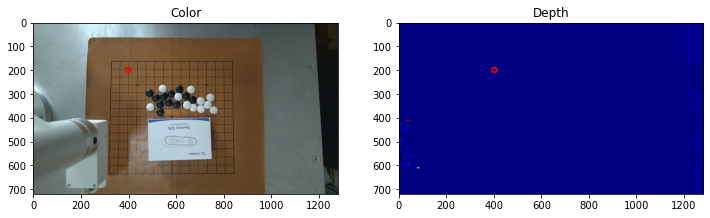

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Color")
plt.imshow(color_canvas[:, :, ::-1])

plt.subplot(1, 2, 2)
plt.title("Depth")

plt.imshow(depth_canvas[:, :, ::-1])

plt.savefig("data/pixel2point3d/compare.png")

## 像素坐标转换为三维空间坐标
将像素坐标转换为RGB相机坐标系下的三维坐标

In [9]:
depth_value = depth_img[py, px]
print(f"深度值: {depth_value} mm")

深度值: 460.0 mm


In [10]:
cam_point3d = camera.depth_pixel2cam_point3d(\
                                px, py, depth_value=depth_value)
cam_x, cam_y, cam_z = cam_point3d
print(f"彩色相机坐标系下的坐标: [{cam_x:.1f}, {cam_y:.1f}, {cam_z:.1f}], 单位mm")

彩色相机坐标系下的坐标: [-165.5, -107.2, 460.0], 单位mm
